In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()



# reflect the tables
Base.prepare(autoload_with=engine)



In [6]:
# View all of the classes that automap found
print(Base.classes.keys())


['measurement', 'station']


In [7]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.

recent_date = session.query(func.max(measurement.date)).first()
print(recent_date)

print(recent_date[0])

('2017-08-23',)
2017-08-23


2016-08-23


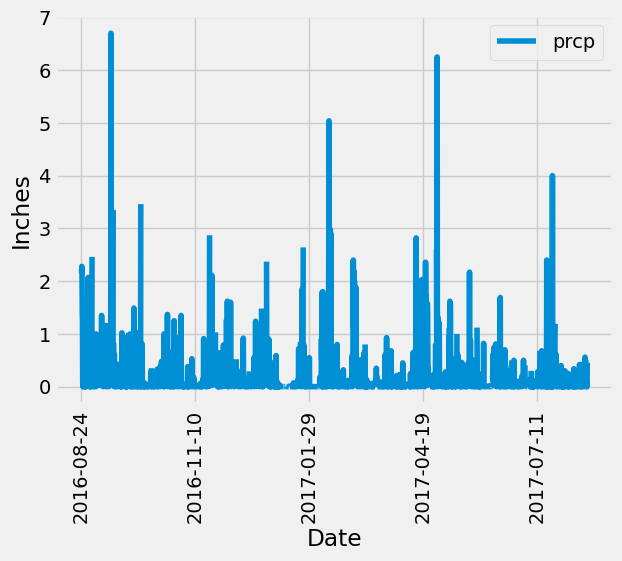

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date = session.query(func.max(measurement.date)).first()

# Calculate the date one year from the last date in data set.
last_year_date = recent_date[0]
last_year_date = dt.date.fromisoformat(last_year_date)
one_year_delta = dt.timedelta(days=365)
last_year_date = last_year_date - one_year_delta
print(last_year_date)

# Perform a query to retrieve the data and precipitation scores
query_recent_year_date_and_precipitation = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date > last_year_date)


# Save the query results as a Pandas DataFrame. Explicitly set the column names
data_df = pd.DataFrame(query_recent_year_date_and_precipitation)

# Sort the dataframe by date
data_df = data_df.sort_values(by='date')
data_df.head(20)

# Use Pandas Plotting with Matplotlib to plot the data
ax = data_df.plot.line(x='date', y='prcp', rot=90)
ax.set_xlabel('Date')
ax.set_ylabel('Inches')

plt.show()



#matplot lib formatting is a little janky - don't want to bother messing with it
# plt.plot(data_df['date'], data_df['prcp'])
# plt.xlabel('Date')
# plt.ylabel('Inches')
# plt.xticks(rotation=90)
# plt.show()

[('2016-08-24', 1.555), ('2016-08-25', 0.07714285714285715), ('2016-08-26', 0.016666666666666666), ('2016-08-27', 0.064), ('2016-08-28', 0.5166666666666666), ('2016-08-29', 0.24333333333333332), ('2016-08-30', 0.011666666666666667), ('2016-08-31', 0.636), ('2016-09-01', 0.006), ('2016-09-02', 0.05), ('2016-09-03', 0.254), ('2016-09-04', 0.27599999999999997), ('2016-09-05', 0.08499999999999999), ('2016-09-06', 0.246), ('2016-09-07', 0.3333333333333333), ('2016-09-08', 0.07666666666666667), ('2016-09-09', 0.17833333333333334), ('2016-09-10', 0.27999999999999997), ('2016-09-11', 0.25), ('2016-09-12', 0.308), ('2016-09-13', 0.45166666666666666), ('2016-09-14', 2.3800000000000003), ('2016-09-15', 0.8266666666666667), ('2016-09-16', 0.11714285714285713), ('2016-09-17', 0.136), ('2016-09-18', 0.10600000000000001), ('2016-09-19', 0.064), ('2016-09-20', 0.14714285714285716), ('2016-09-21', 0.19499999999999998), ('2016-09-22', 0.2057142857142857), ('2016-09-23', 0.22428571428571425), ('2016-09-2

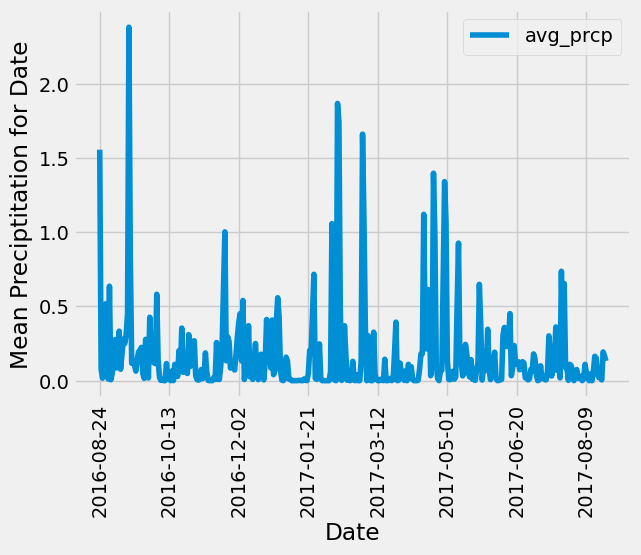

In [11]:
#to look at the data

#looks like repeated values due to separate stations, inconsistent due to NaN's
# session.query(measurement.date, func.count(measurement.date)).group_by(measurement.date).all()


#perhaps it would be worth it to try graphing where we take the mean and graph that

alt_data = (
    session
    .query(measurement.date, func.avg(measurement.prcp.label('avg_prcp')))
    .filter(measurement.date > last_year_date)
    .group_by(measurement.date)
    .all()
)


print(alt_data)

alt_df = pd.DataFrame(alt_data, columns=['date','avg_prcp'])
alt_df.head()

ax = alt_df.plot.line(x='date', y='avg_prcp', rot=90)
ax.set_xlabel('Date')
ax.set_ylabel('Mean Preciptitation for Date')

plt.show()

#it certainly seems that this is what we want - it is cleaner, and has fewer outliers

#that said, it isn't what the assignment has technically asked of us, so I will continue with the "flawed" data for now

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data

display(data_df.describe())

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset


In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [17]:
# Close Session
session.close()